In [ ]:
#(b) X matrix Generation.
import numpy as np
import imageio
from matplotlib import pylab as plt
import matplotlib.cm as cm
import cv2  
from skimage import transform,data

width = 50
height = 50
reshape_size = width*height

train_labels, train_data = [], []
for line in open('/content/drive/MyDrive/SYDE675/Final_project/train.txt'):
  im = imageio.imread(line.strip().split()[0], as_gray = True)
  im_resized=transform.resize(im, (width, height))
  train_data.append(im_resized.reshape(reshape_size,))
  train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)

print (train_data.shape)
print (train_labels.shape)
print('The original training image of ID 10:')
plt.imshow(train_data[10, :].reshape(width,height), cmap = cm.Greys_r)
plt.show()


The average training image:


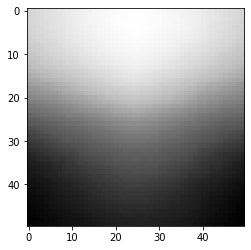

In [ ]:
#(c) Average image.
average_X = train_data.mean(axis=0)
print('The average training image:')
plt.imshow(average_X.reshape(width, height), cmap = cm.Greys_r)
plt.show()

(14034, 2500)
The after-subtraction training image of ID 10:


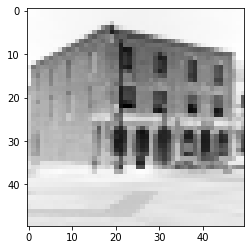

In [ ]:
#(d) Mean Subtraction.
new_X = train_data - average_X
print (new_X.shape)
print('The after-subtraction training image of ID 10:')
plt.imshow(new_X[10, :].reshape(width, height), cmap = cm.Greys_r)
plt.show()

(3000, 2500)
(3000,)
The original testing image of ID 10:


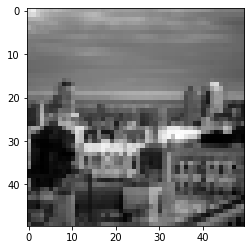

The average testing image:


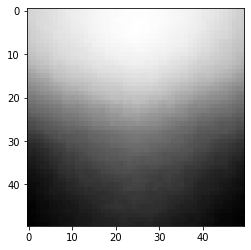

(3000, 2500)
The after-subtraction testing image of ID 10:


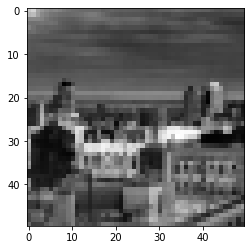

In [ ]:
#(d) Mean Subtraction for testing set
test_labels, test_data = [], []
for line in open('/content/drive/MyDrive/SYDE675/Final_project/test.txt'):
  im = imageio.imread(line.strip().split()[0], as_gray = True)
  im_resized=transform.resize(im, (width, height))
  test_data.append(im_resized.reshape(reshape_size,))
  test_labels.append(line.strip().split()[1])
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)
print (test_data.shape)
print (test_labels.shape)
print('The original testing image of ID 10:')
plt.imshow(test_data[10, :].reshape(width, height), cmap = cm.Greys_r)
plt.show()

average_test_X = test_data.mean(axis=0)
print('The average testing image:')
plt.imshow(average_test_X.reshape(width, height), cmap = cm.Greys_r)
plt.show()

new_test_X = test_data - average_test_X
print (new_test_X.shape)
print('The after-subtraction testing image of ID 10:')
plt.imshow(new_test_X[10, :].reshape(width, height), cmap = cm.Greys_r)
plt.show()



(2500, 2500)
0-th eigenvector:


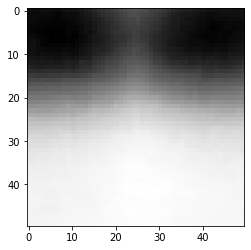

1-th eigenvector:


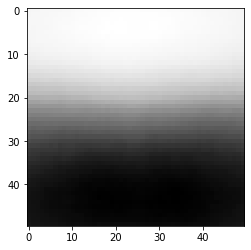

2-th eigenvector:


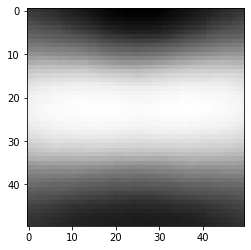

3-th eigenvector:


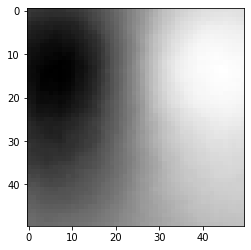

4-th eigenvector:


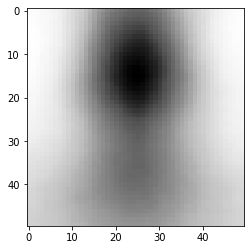

5-th eigenvector:


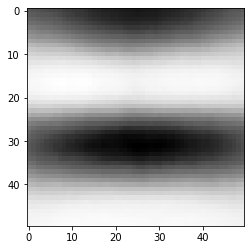

6-th eigenvector:


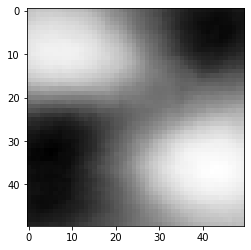

7-th eigenvector:


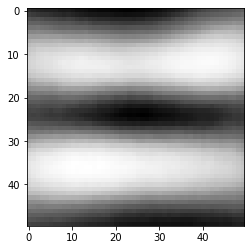

8-th eigenvector:


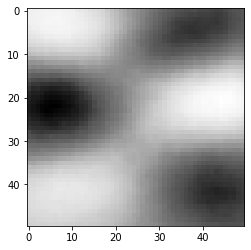

9-th eigenvector:


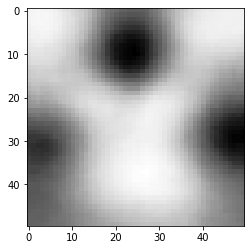

In [ ]:
#(e) EigenVector.
U,s,V = np.linalg.svd(new_X)
print(V.shape)

for i in range(10):
  print("%s-th eigenvector:" %(str(i)))
  plt.imshow(V[i, :].reshape(width, height), cmap = cm.Greys_r)
  plt.show()


Approximation error cruve of rank-r:


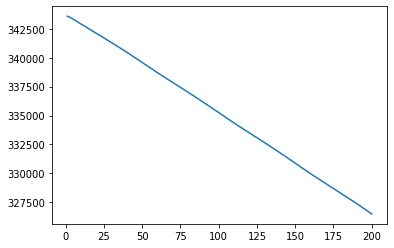

In [ ]:
#(f) Low-rank Approximation.
from numpy import linalg as LA
S = np.diag(s)

Supplementary_matrix_S = np.zeros((s.shape[0],V.shape[0]-s.shape[0]))
S = np.hstack((S, Supplementary_matrix_S))

r_list = []
error_list = []

for r in range(1,201):

  r_list.append(r)
  X_r = np.dot(U[:,:r], S[:r,:r])
  X_r = np.dot(X_r, V[:r,:r])

  Supplementary_matrix_X_r = np.zeros((X_r.shape[0],V.shape[0]-r))
  X_error = new_X - np.hstack((X_r, Supplementary_matrix_X_r))
  Error = LA.norm(X_error)
  error_list.append(Error)

x = r_list
y = error_list
print('Approximation error cruve of rank-r:')
plt.plot(x, y)
plt.show()





In [ ]:
#(g) EigenVector Feature.
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
multi_class='ovr'
solver='liblinear'

r = 40
F = np.dot(new_X, np.transpose(V[:r,:]))

F_test = np.dot(new_test_X, np.transpose(V[:r,:]))

X_train = F
y_train = train_labels

X_test = F_test
y_test = test_labels

log_reg = LogisticRegression(multi_class=multi_class, solver=solver, max_iter=1000)  

log_reg.fit(X_train, y_train)
predict_test = log_reg.predict(X_test)


acc = sum(predict_test==y_test)/X_test.shape[0]

print('Classification accuracy of r = 10:')
print(acc)

Classification accuracy of r = 10:
0.433


1
0.27666666666666667
2
0.3526666666666667
3
0.37
4
0.36766666666666664
5
0.42033333333333334
6
0.424
7
0.4266666666666667
8
0.428
9
0.42633333333333334
10
0.42966666666666664
11
0.429
12
0.42866666666666664
13
0.43266666666666664
14
0.43066666666666664
15
0.432
16
0.434
17
0.43433333333333335
18
0.43466666666666665
19
0.43166666666666664
20
0.43266666666666664
21
0.434
22
0.433
23
0.43233333333333335
24
0.433
25
0.433
26
0.434
27
0.43166666666666664
28
0.43166666666666664
29
0.43333333333333335
30
0.43366666666666664
31
0.43433333333333335
32
0.433
33
0.433
34
0.43233333333333335
35
0.43266666666666664
36
0.433
37
0.43233333333333335
38
0.43333333333333335
39
0.43366666666666664
40
0.433
41
0.43333333333333335
42
0.43266666666666664
43
0.433
44
0.43133333333333335
45
0.43233333333333335
46
0.431
47
0.43266666666666664
48
0.43433333333333335
49
0.43433333333333335
50
0.43533333333333335
51
0.437
52
0.43766666666666665
53
0.436
54
0.43633333333333335
55
0.43633333333333335
56
0.43766666

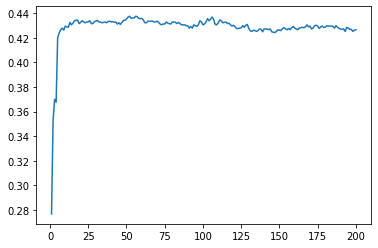

Classification accuracy list:
[0.27666666666666667, 0.3526666666666667, 0.37, 0.36766666666666664, 0.42033333333333334, 0.424, 0.4266666666666667, 0.428, 0.42633333333333334, 0.42966666666666664, 0.429, 0.42866666666666664, 0.43266666666666664, 0.43066666666666664, 0.432, 0.434, 0.43433333333333335, 0.43466666666666665, 0.43166666666666664, 0.43266666666666664, 0.434, 0.433, 0.43233333333333335, 0.433, 0.433, 0.434, 0.43166666666666664, 0.43166666666666664, 0.43333333333333335, 0.43366666666666664, 0.43433333333333335, 0.433, 0.433, 0.43233333333333335, 0.43266666666666664, 0.433, 0.43233333333333335, 0.43333333333333335, 0.43366666666666664, 0.433, 0.43333333333333335, 0.43266666666666664, 0.433, 0.43133333333333335, 0.43233333333333335, 0.431, 0.43266666666666664, 0.43433333333333335, 0.43433333333333335, 0.43533333333333335, 0.437, 0.43766666666666665, 0.436, 0.43633333333333335, 0.43633333333333335, 0.43766666666666665, 0.43733333333333335, 0.436, 0.43566666666666665, 0.436, 0.4346

In [ ]:
#(h) Face Recognition.

r_list= []
acc_list = []
for r in range(1,201):
  print(r)
  r_list.append(r)
  F = np.dot(new_X, np.transpose(V[:r,:]))
  F_test = np.dot(new_test_X, np.transpose(V[:r,:]))

  X_train = F
  y_train = train_labels

  X_test = F_test
  y_test = test_labels

  log_reg = LogisticRegression(multi_class=multi_class, solver=solver, max_iter=1000)  

  log_reg.fit(X_train, y_train)
  predict_test = log_reg.predict(X_test)


  acc = sum(predict_test==y_test)/X_test.shape[0]
  acc_list.append(acc)
  print(acc)

x = r_list
y = acc_list
print('Classification accuracy cruve of rank-r:')
plt.plot(x, y)
plt.show()
print('Classification accuracy list:')
print(acc_list)
